In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [57]:
mdf = pd.read_csv('/Users/algrhythm/Flatiron/Projects/DCDS-MOD1---MS-Movies/data/processed/movies_0304_1851.csv')
mdf['roi'] = mdf['domestic_profit'] / mdf['production_budget'] * 100
aa = mdf.loc[mdf['film_type'] == 'Action/Adventure']

rating_profit = aa[['Title', 'Rated', 'domestic_profit', 'roi', 'production_budget', 'release_month']]
rating_profit

,Title,Rated,domestic_profit,roi,production_budget,release_month
0,Star Wars: Episode VII - The Force Awakens,PG-13,630662225,206.098766,306000000,Dec
1,Black Panther,PG-13,500059566,250.029783,200000000,Feb
2,Jurassic World,PG-13,437270625,203.381686,215000000,Jun
3,Incredibles 2,PG,408581744,204.290872,200000000,Jun
4,Avengers: Infinity War,PG-13,378815482,126.271827,300000000,Apr
6,Rogue One: A Star Wars Story,PG-13,332177324,166.088662,200000000,Dec
7,Jumanji: Welcome to the Jungle,PG-13,314508916,349.454351,90000000,Dec
8,Deadpool,R,305070709,525.983981,58000000,Feb
9,Star Wars: Episode VIII - The Last Jedi,PG-13,303181382,95.640815,317000000,Dec
13,Wonder Woman,PG-13,262563408,175.042272,150000000,Jun


In [58]:
rating_profit['Rated'].describe()

count        21
unique        3
top       PG-13
freq         17
Name: Rated, dtype: object

In [59]:
rg = rating_profit.groupby(['Rated']).sum()
rg = rg.sort_values(by='domestic_profit', ascending=False)

In [60]:
rg

,domestic_profit,roi,production_budget
Rated,,,
PG-13,4725833096,2409.930855,3578600000
R,669762498,806.838836,343000000
PG,408581744,204.290872,200000000


In [129]:
rg.reset_index
rg['mpaa'] = rg.index
rg['count'] = [1, 17, 3]
rg['agg_roi'] = rg['domestic_profit'] / rg['production_budget']
# rg = rg.sort_values(by='count', ascending=True)

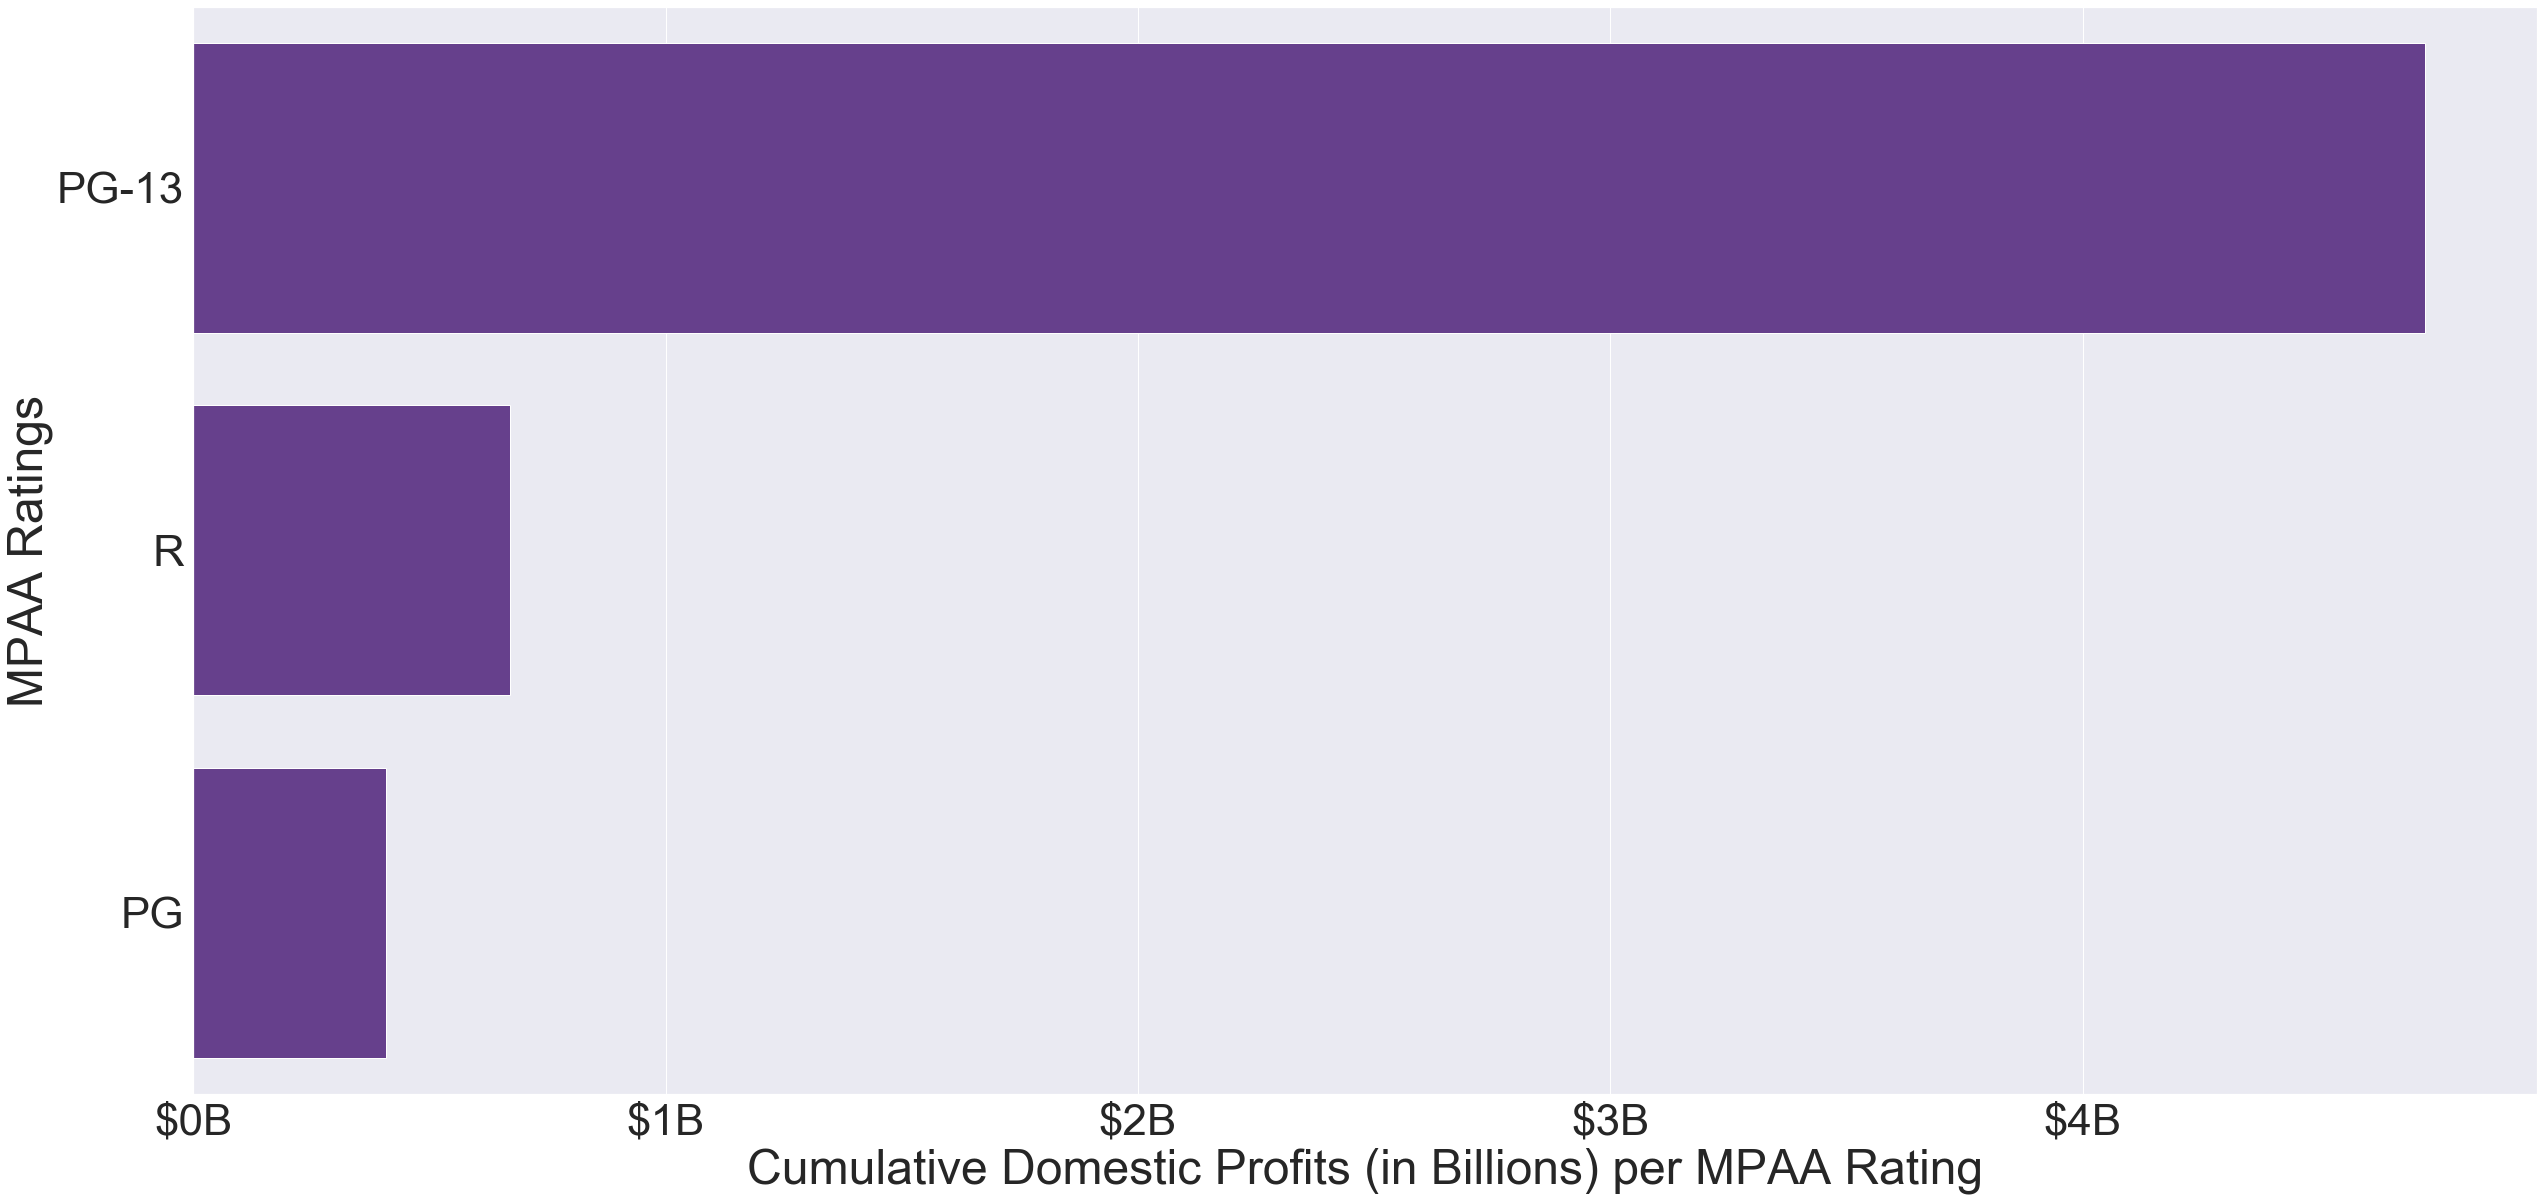

In [130]:
fig_dims = (42, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(font_scale=4)

mpaa_chart = sns.barplot(data=rg, x='domestic_profit', y='mpaa', ci=None, color='rebeccapurple', label='medium')
ax.set(xlabel='Cumulative Domestic Profits (in Billions) per MPAA Rating', ylabel='MPAA Ratings')

xlabels = ['${:,.0f}'.format(x) + 'B' for x in mpaa_chart.get_xticks()/1000000000]
mpaa_chart.set_xticklabels(xlabels)

plt.savefig('mpaa_and_profit.png')

In [81]:
# sns.barplot(data=rg, x='agg_roi', y='mpaa', ci=None)

In [206]:
months = rating_profit

months = rating_profit.groupby(['release_month']).sum()
months = months.sort_values(by='domestic_profit', ascending=False)
months['Release Month'] = months.index

months['Aggregate ROI'] = months['domestic_profit'] / months['production_budget'] * 100

months = months.append({'domestic_profit': 0, 'roi': 0, 'production_budget': 0, \
                        'Release Month': 'Jan', 'Aggregate ROI':0}, ignore_index=True)
months = months.append({'domestic_profit': 0, 'roi': 0, 'production_budget': 0, \
                        'Release Month': 'Sept', 'Aggregate ROI':0}, ignore_index=True)
months = months.append({'domestic_profit': 0, 'roi': 0, 'production_budget': 0, \
                        'Release Month': 'Oct', 'Aggregate ROI':0}, ignore_index=True)

months['month int'] = [12, 6, 2, 5, 4, 11, 3, 7, 8, 1, 9, 10]
months = months.sort_values(by='month int', ascending=True)

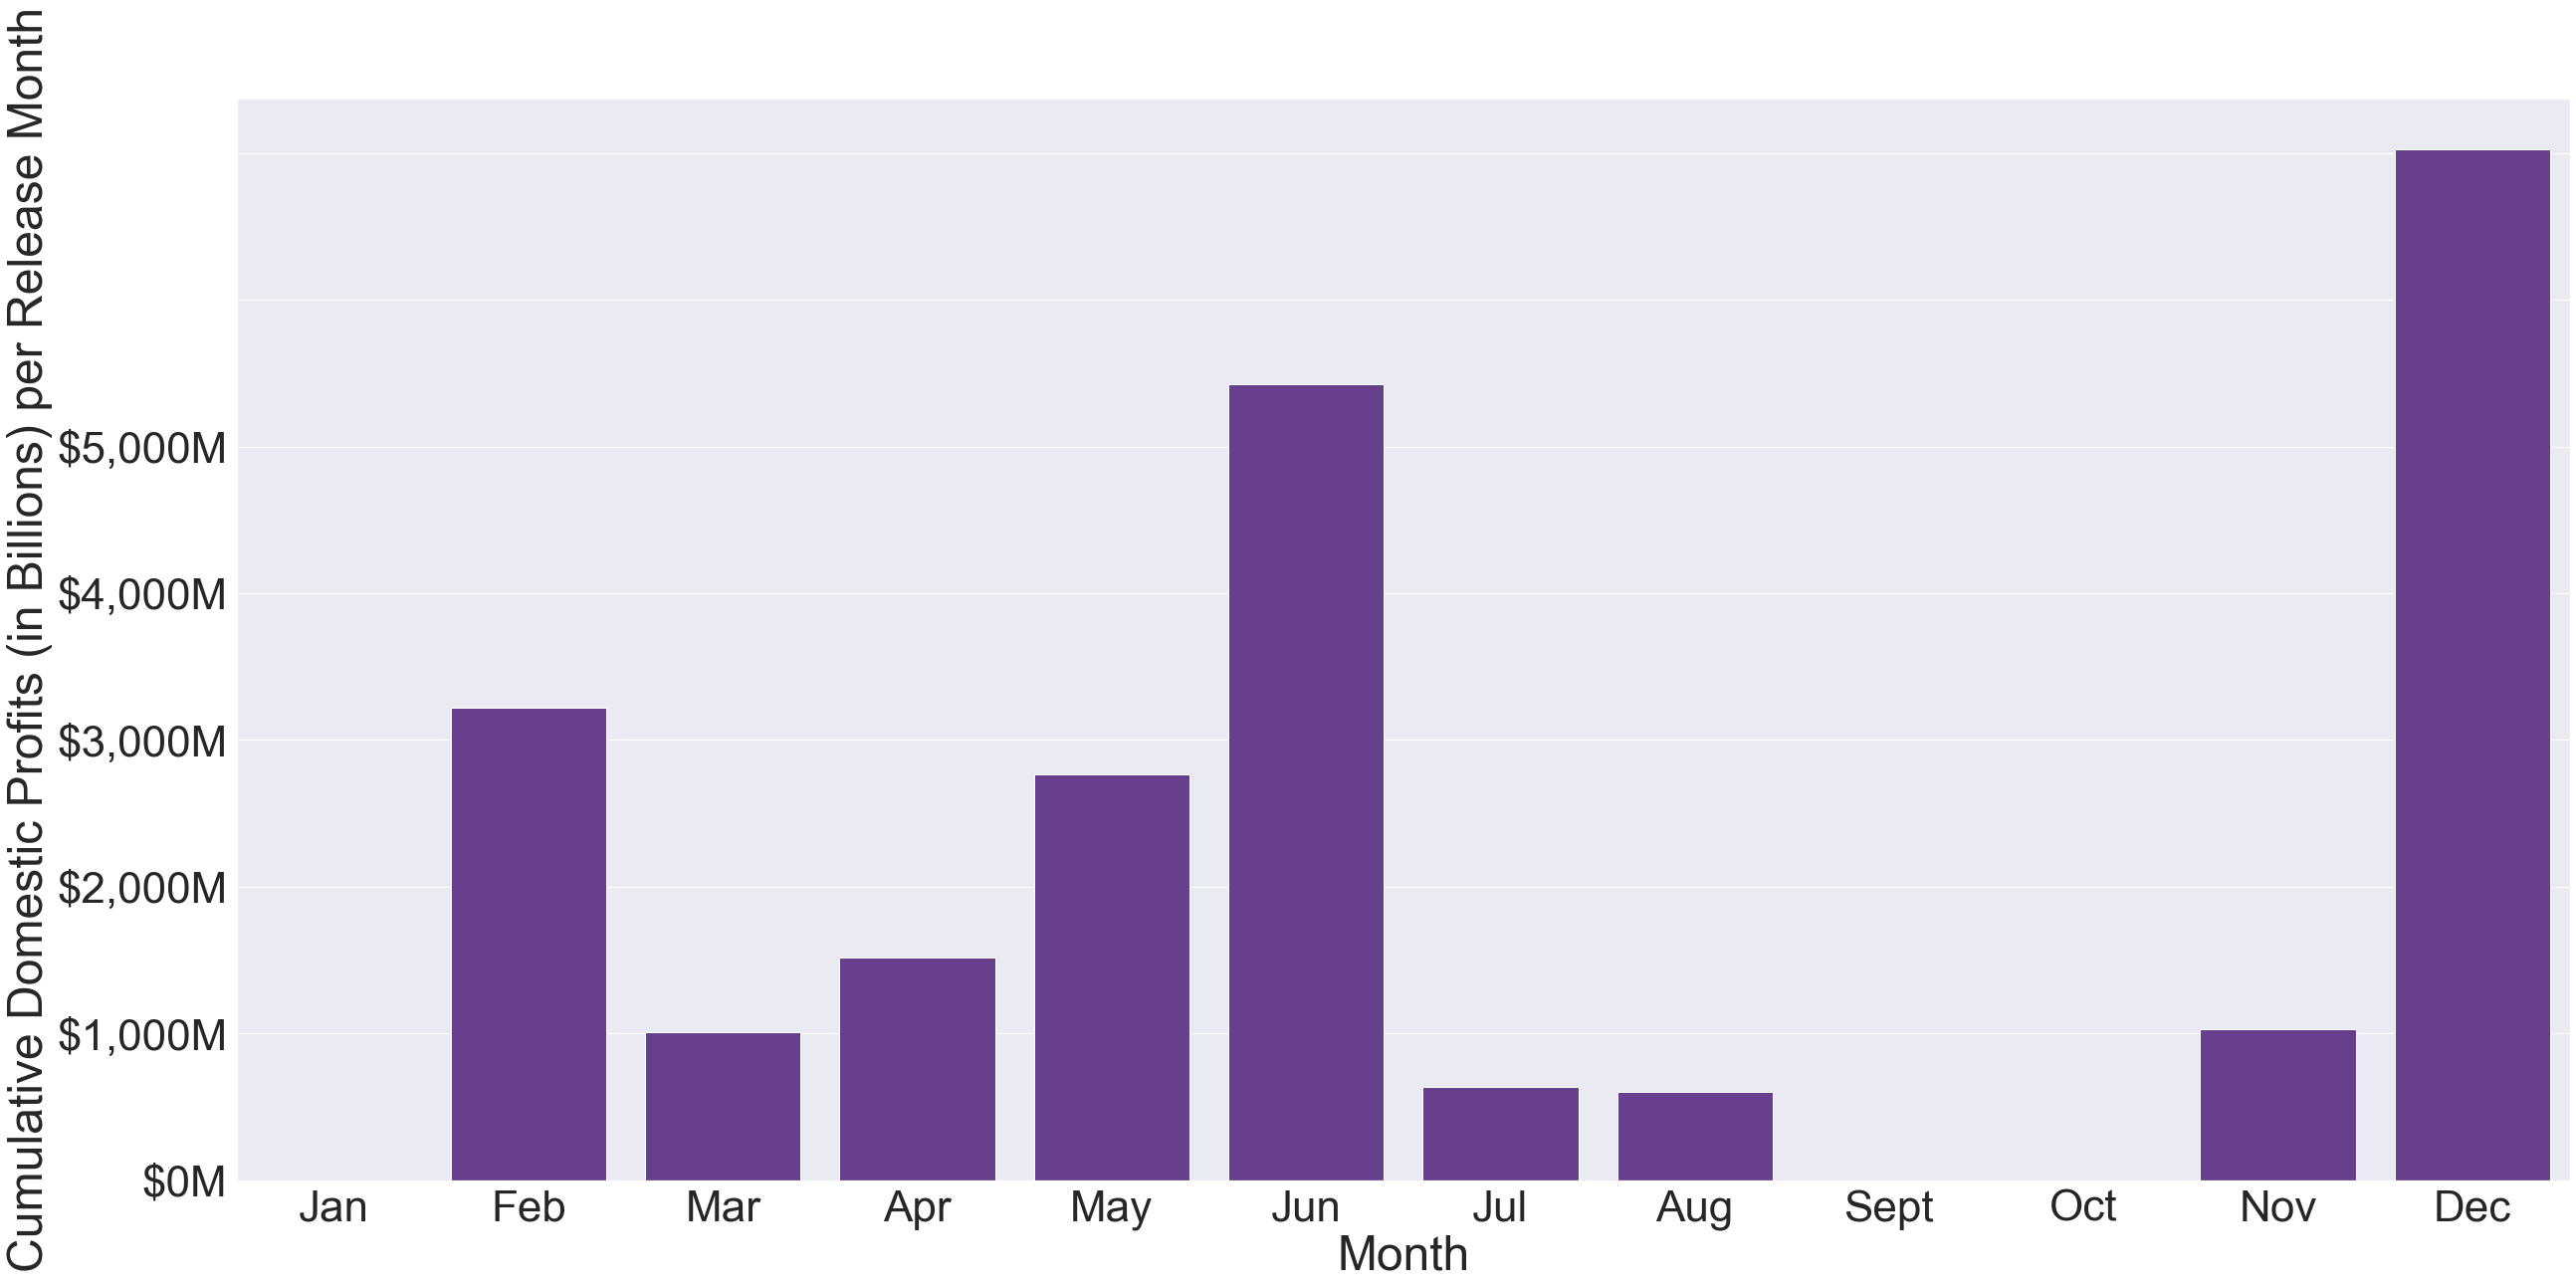

In [209]:
fig_dims = (42, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(font_scale=4)

months = months.sort_values(by='month int')
month_chart = sns.barplot(data=months, y='domestic_profit', x='Release Month', ci=None, color = 'rebeccapurple')

ax.set(ylabel='Cumulative Domestic Profits (in Billions) per Release Month', xlabel='Month')

ylabels = ['${:,.0f}'.format(y) + 'M' for y in mpaa_chart.get_xticks()/1000000]
month_chart.set_yticklabels(ylabels)

plt.savefig('month_profit.png')

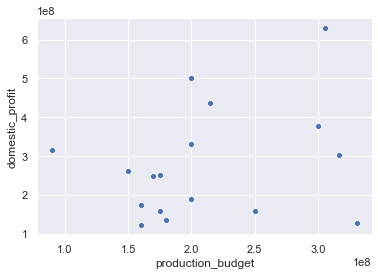

In [218]:
pg13 = aa.loc[aa['Rated'] == 'PG-13']
sns.scatterplot(data=pg13, x='production_budget', y='domestic_profit')
sns.set(font_scale=.5)

In [219]:
x = np.array(pg13['production_budget']).reshape((-1, 1))
y = np.array(pg13['domestic_profit'])

In [220]:
model = LinearRegression()
model.fit(x, y)
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('intercept:', model.intercept_)

coefficient of determination: 0.07230661503903135
intercept: 157774922.27760774
intercept: 157774922.27760774
